In [1]:
import matplotlib.pyplot as plt

import winsound
import pandas as pd

import numpy as np

import mlrose_hiive
from time import time
from HelperFunctions import *

In [2]:
from mlrose_hiive import TSPOpt

In [3]:
coords = [[0 for x in range(2)] for x in range(200)]
for i in range(0, len(coords)):
    coords[i][0] = np.random.random()
    coords[i][1] = np.random.random()

prob = TSPOpt(length = 200, coords=coords, maximize=True)

In [4]:
search_params = {
    'iteration_list'   : [10000],
    'seed'             :  0,
    'max_attempts'     :  100
}

rhc_run_stats, rhc_curves, rh_time = run_rh(prob, search_params)
print('Random Hill Climb complete')
winsound.Beep(600, 600)

sa_run_stats, sa_run_curves, sa_time = run_sa(prob, search_params)
print('Simulated Annealing complete')
winsound.Beep(600, 600)

ga_run_stats, ga_run_curves, ga_time = run_ga(prob, search_params)
print('Genetic Algorithm complete')
winsound.Beep(600, 600)

mmc_run_stats, mmc_run_curves, mimic_time = run_mimic(prob, search_params)
print('MIMIC complete')
winsound.Beep(600, 600)

Random Hill Climb complete
Simulated Annealing complete
Genetic Algorithm complete
MIMIC complete


## Plot Convergence

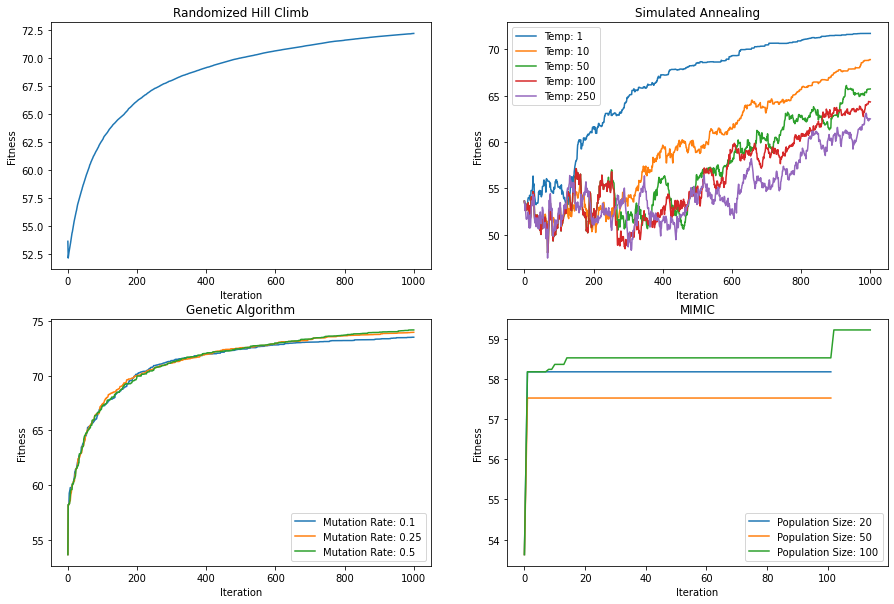

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plot_params = {'ylabel':'Fitness', 'xlabel':'Iteration'}
rhc_curves.groupby('Iteration').mean().reset_index().Fitness.plot(ax=ax[0][0], title='Randomized Hill Climb', **plot_params, ylim=(0,100))

for temp in sa_run_curves['Temperature'].map(lambda x: x.init_temp).unique():
    cur = sa_run_curves[sa_run_curves['Temperature'].map(lambda x: x.init_temp == temp)].groupby('Iteration').mean().reset_index()
    ax[0][1].plot(cur.Fitness, label=f'Temp: {temp}')
    ax[0][1].legend()
    ax[0][1].set_title('Simulated Annealing')
    ax[0][1].set_xlabel('Iteration')
    ax[0][1].set_ylabel('Fitness')
    ax[0][1].set_ylim(0,100)
    
    
for mut in ga_run_curves['Mutation Rate'].unique():
    cur = ga_run_curves[ga_run_curves['Mutation Rate'] == mut].groupby('Iteration').mean().reset_index()
    ax[1][0].plot(cur.Fitness, label=f'Mutation Rate: {mut}')
    ax[1][0].legend()
    ax[1][0].set_title('Genetic Algorithm')
    ax[1][0].set_ylabel('Fitness')
    ax[1][0].set_xlabel('Iteration')
    ax[1][0].set_ylim(0,100)
    
for pop in mmc_run_curves['Population Size'].unique():
    cur = mmc_run_curves[mmc_run_curves['Population Size'] == pop].groupby('Iteration').mean().reset_index()
    ax[1][1].plot(cur.Fitness, label=f'Population Size: {pop}')
    ax[1][1].set_ylabel('Fitness')
    ax[1][1].set_xlabel('Iteration')
    ax[1][1].legend()
    ax[1][1].set_title('MIMIC')
    ax[1][1].set_ylim(0,100)

## Wall Clock Plot

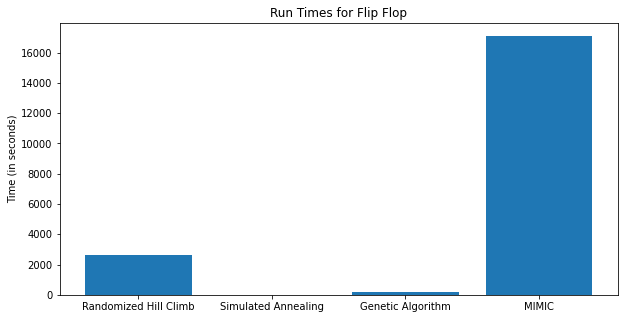

In [6]:
times = pd.DataFrame(
    {'Times':[rh_time, sa_time, ga_time, mimic_time]}, 
    index=['Randomized Hill Climb', 'Simulated Annealing', 'Genetic Algorithm', 'MIMIC'])

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(times.index, times.Times)
# times.plot.bar()
ax.set_ylabel('Time (in seconds)')
ax.set_title('Run Times for Flip Flop');